In [10]:
import os
import tensorflow
from tensorflow import keras
import PIL.Image
import PIL.ImageOps
import PIL.ExifTags
from PIL.ExifTags import TAGS
import json
import numpy as np

directory = 'C:\\Users\\Yabba\\Documents\\Projects\\SeniorResearch\\OBJ2CNN\\OutputPics\\Morb512\\'

train_images = []
train_targets = []
validation_images = []
validation_targets = []

val_split = 2/10
#img = PIL.Image.open(directory+os.listdir(directory)[0])
#print(directory+os.listdir(directory)[0])
#print((img.info['Note']))

inputImages = os.listdir(directory)

for i, d in enumerate(inputImages) :
    img = PIL.Image.open(directory+d)
    #raw = tensorflow.io.read_file(directory+d)
    #img = raw.decode_png(channels=1)
    #print(img[0][0])

    dataBBox3d = eval(img.info['Note'])['BBox3D']
    #print(dataBBox3d)
    BBox3D = np.asarray([ [c[0], c[1]]  for c in (dataBBox3d)]).flatten()
    #print(BBox3D)
    #print(np.asarray(eval(img.info['Note'])['BBox3D']).flatten())
    #BBox3D = [c for c in (eval(img.info['Note'])['BBox3D']).flatten() ]
    
    #print(crash)

    if i < len(inputImages) - len(inputImages)*val_split :
        image = keras.preprocessing.image.load_img(directory+d, color_mode = 'grayscale')
        train_images.append(keras.preprocessing.image.img_to_array(image))
        train_targets.append((BBox3D))
    else :
        image = keras.preprocessing.image.load_img(directory+d, color_mode = 'grayscale')
        validation_images.append(keras.preprocessing.image.img_to_array(image))
        validation_targets.append((BBox3D))
    pass
#print(type(train_targets[0]))

print ('{:03d} training images'.format(len(train_images)))
print ('{:03d} validation images'.format(len(validation_images)))

print ('{:03d} training targets'.format(len(train_targets)))
print ('{:03d} validation targets'.format(len(validation_targets)))

print ('{} training target'.format(type(train_targets[0])))
print ('{} validation targets'.format(type(validation_targets[0])))

print(list(train_targets[0]))
#print(type(train_targets[0][0]))
#display(train_images[0])

train_images = tensorflow.stack(train_images)
train_targets = tensorflow.stack(train_targets)
validation_images = tensorflow.stack(validation_images)
validation_targets = tensorflow.stack(validation_targets)

print(train_images.shape)


410 training images
102 validation images
410 training targets
102 validation targets
<class 'numpy.ndarray'> training target
<class 'numpy.ndarray'> validation targets
[0.2252, 0.5091, 0.4334, 0.5034, 0.404, 0.5199, 0.2179, 0.5284, 0.2183, 0.0465, 0.4182, 0.1298, 0.3916, 0.186, 0.2123, 0.125]
(410, 144, 256, 1)


In [11]:
#import tensorflow as tf
from keras import layers
from keras.models import Sequential

width = 256
height = 144

input_shape = (height, width, 1)
input_layer = keras.layers.Input(input_shape)

#create the base layers
base_layers = layers.Rescaling(1./255, name='bl_1')(input_layer)
base_layers = layers.Conv2D(16, 1, padding='same', activation='relu', name='bl_2')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_3')(base_layers)
base_layers = layers.Conv2D(32, 1, padding='same', activation='relu', name='bl_4')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_5')(base_layers)
base_layers = layers.Conv2D(64, 1, padding='same', activation='relu', name='bl_6')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_7')(base_layers)
base_layers = layers.Flatten(name='bl_8')(base_layers)

#create the localiser branch
locator_branch = layers.Dense(128, activation='relu', name='bb_1')(base_layers)
locator_branch = layers.Dense(64, activation='relu', name='bb_2')(locator_branch)
locator_branch = layers.Dense(32, activation='relu', name='bb_3')(locator_branch)
locator_branch = layers.Dense(16, activation='sigmoid', name='bb_head')(locator_branch)

model = keras.Model(input_layer, outputs = [locator_branch])
model.summary()

losses = {'bb_head': keras.losses.MSE}
model.compile(loss = losses, optimizer = 'Adam', metrics= ['accuracy'])

trainTargets = {'bb_head' : train_targets}
validationTargets = {'bb_head' : validation_targets}

#trainTargets = train_targets
#validationTargets = validation_targets


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 144, 256, 1)]     0         
                                                                 
 bl_1 (Rescaling)            (None, 144, 256, 1)       0         
                                                                 
 bl_2 (Conv2D)               (None, 144, 256, 16)      32        
                                                                 
 bl_3 (MaxPooling2D)         (None, 72, 128, 16)       0         
                                                                 
 bl_4 (Conv2D)               (None, 72, 128, 32)       544       
                                                                 
 bl_5 (MaxPooling2D)         (None, 36, 64, 32)        0         
                                                                 
 bl_6 (Conv2D)               (None, 36, 64, 64)        2112  

In [14]:
training_epochs = 20

#history = model.fit( train_images, trainTargets,
             #validation_data=(validation_images, validationTargets),
             #batch_size=4,
             #epochs=training_epochs,
             #shuffle=True,
             #verbose=1)

history = model.fit( 
    train_images, trainTargets, 
    validation_data=(validation_images, validationTargets),
    batch_size=16,
    epochs=training_epochs,
    shuffle=True,
    verbose=1)

Epoch 1/20
26/26 [==============================] - 4s 139ms/step - loss: 0.0510 - accuracy: 0.1756 - val_loss: 0.0959 - val_accuracy: 0.0196
Epoch 2/20
26/26 [==============================] - 4s 137ms/step - loss: 0.0468 - accuracy: 0.1659 - val_loss: 0.1022 - val_accuracy: 0.0784
Epoch 3/20
26/26 [==============================] - 4s 135ms/step - loss: 0.0466 - accuracy: 0.1756 - val_loss: 0.1023 - val_accuracy: 0.1078
Epoch 4/20
26/26 [==============================] - 3s 134ms/step - loss: 0.0438 - accuracy: 0.2024 - val_loss: 0.0984 - val_accuracy: 0.0882
Epoch 5/20
26/26 [==============================] - 3s 133ms/step - loss: 0.0415 - accuracy: 0.1634 - val_loss: 0.1030 - val_accuracy: 0.0980
Epoch 6/20
26/26 [==============================] - 3s 131ms/step - loss: 0.0400 - accuracy: 0.1585 - val_loss: 0.1018 - val_accuracy: 0.1078
Epoch 7/20
26/26 [==============================] - 3s 131ms/step - loss: 0.0395 - accuracy: 0.2098 - val_loss: 0.1023 - val_accuracy: 0.0686
Epoch 

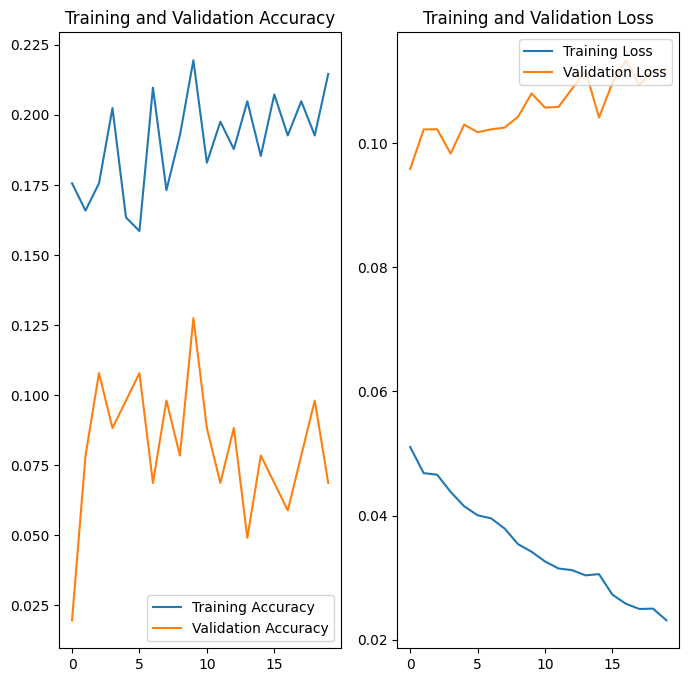

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(training_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#model.save(filepath = '{}\\newModel2'.format(os.getcwd()),save_format='tf')

In [16]:
model.save(filepath = '{}newModel3'.format('C:\\Users\\Yabba\\Documents\\Projects\\SeniorResearch\\OBJ2CNN\\OutputModels\\'),save_format='tf')

INFO:tensorflow:Assets written to: C:\Users\Yabba\Documents\Projects\SeniorResearch\OBJ2CNN\OutputModels\newModel3\assets


INFO:tensorflow:Assets written to: C:\Users\Yabba\Documents\Projects\SeniorResearch\OBJ2CNN\OutputModels\newModel3\assets
